# ATM Transaction Data Analysis Using ANN

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Necessary Libraries

In [1]:
#! pip install skimpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

In [2]:
atm_df=pd.read_csv(r"/content/drive/MyDrive/ATM ANN/1471093-atm_bank_dataset.csv") #Reading the csv file

In [11]:
atm_df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [12]:
#skim(atm_df)

NameError: ignored

In [13]:
atm_df.info()# checking with Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      2244 non-null   int64 
 1   atm_name                2244 non-null   object
 2   weekday                 2244 non-null   object
 3   festival_religion       2244 non-null   object
 4   working_day             2244 non-null   object
 5   holiday_sequence        2244 non-null   object
 6   trans_date_set          2244 non-null   int64 
 7   trans_month             2244 non-null   int64 
 8   trans_year              2244 non-null   int64 
 9   prevweek_mean           2244 non-null   int64 
 10  total_amount_withdrawn  2244 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 193.0+ KB


In [14]:
atm_df.describe()# Checking with Data Description

,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06


In [15]:
atm_df.isnull().sum()#checking with NUll values

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

In [16]:
atm_df.columns

Index(['id', 'atm_name', 'weekday', 'festival_religion', 'working_day',
       'holiday_sequence', 'trans_date_set', 'trans_month', 'trans_year',
       'prevweek_mean', 'total_amount_withdrawn'],
      dtype='object')

## Dealing with Outliers

<Axes: xlabel='total_amount_withdrawn'>

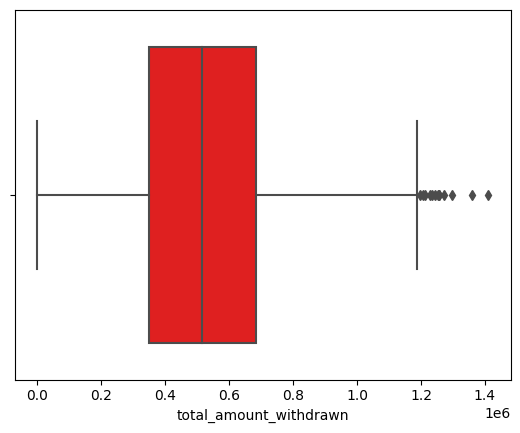

In [17]:
sns.boxplot(x=atm_df.total_amount_withdrawn,color="red")

In [23]:
#Dealing with outliers of "total_amount_withdrawn" feature
q1=atm_df.total_amount_withdrawn.quantile(0.20)
q3=atm_df.total_amount_withdrawn.quantile(0.80)
IQR=q3-q1
IQR_threshold=1.5
lower_limit=max(atm_df.total_amount_withdrawn.min(),q1-(IQR_threshold*IQR))
upper_limit=min(atm_df.total_amount_withdrawn.max(),q3+(IQR_threshold*IQR))
upper_outlier=atm_df[atm_df.total_amount_withdrawn>upper_limit]
lower_outlier=atm_df[atm_df.total_amount_withdrawn<lower_limit]
#printing the outliers
print("Upper_Outliers:\n",upper_outlier)
print("Lower_Outliers:\n",lower_outlier)



Upper_Outliers:
 Empty DataFrame
Columns: [id, atm_name, weekday, festival_religion, working_day, holiday_sequence, trans_date_set, trans_month, trans_year, prevweek_mean, total_amount_withdrawn]
Index: []
Lower_Outliers:
 Empty DataFrame
Columns: [id, atm_name, weekday, festival_religion, working_day, holiday_sequence, trans_date_set, trans_month, trans_year, prevweek_mean, total_amount_withdrawn]
Index: []


In [24]:
#clipping the outlier to upper bound of "total_amount_withdrawn"
atm_df.total_amount_withdrawn=atm_df.total_amount_withdrawn.clip(lower=lower_limit,upper=upper_limit)

<Axes: xlabel='prevweek_mean'>

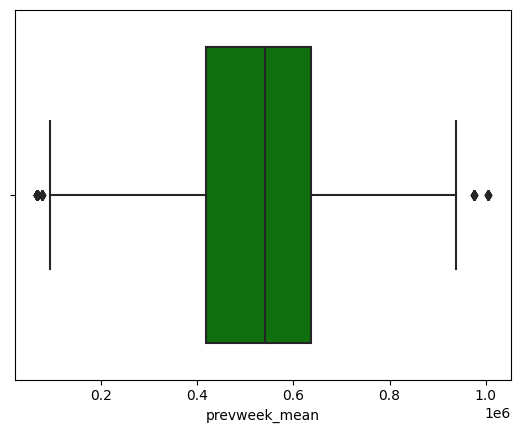

In [25]:
#checking with Outliers in "prevweek_mean"
sns.boxplot(x=atm_df.prevweek_mean,color="Green")

In [26]:
#Dealing with outliers of "prevweek_mean" feature
q1=atm_df.prevweek_mean.quantile(0.25)
q3=atm_df.prevweek_mean.quantile(0.78)
IQR=q3-q1
IQR_threshold=1.5
lower_limit=max(atm_df.prevweek_mean.min(),q1-(IQR_threshold*IQR))
upper_limit=min(atm_df.prevweek_mean.max(),q3+(IQR_threshold*IQR))
upper_outlier=atm_df[atm_df.prevweek_mean>upper_limit]
lower_outlier=atm_df[atm_df.prevweek_mean<lower_limit]
#printing the outliers
print("Upper_Outliers:\n",upper_outlier)
print("Lower_Outliers:\n",lower_outlier)

Upper_Outliers:
 Empty DataFrame
Columns: [id, atm_name, weekday, festival_religion, working_day, holiday_sequence, trans_date_set, trans_month, trans_year, prevweek_mean, total_amount_withdrawn]
Index: []
Lower_Outliers:
 Empty DataFrame
Columns: [id, atm_name, weekday, festival_religion, working_day, holiday_sequence, trans_date_set, trans_month, trans_year, prevweek_mean, total_amount_withdrawn]
Index: []


In [27]:
#clipping the outliers both lower and upper bounds to "prevweek_mean"
atm_df.prevweek_mean=atm_df.prevweek_mean.clip(lower=lower_limit,upper=upper_limit)

## Exploratory Data Analysis

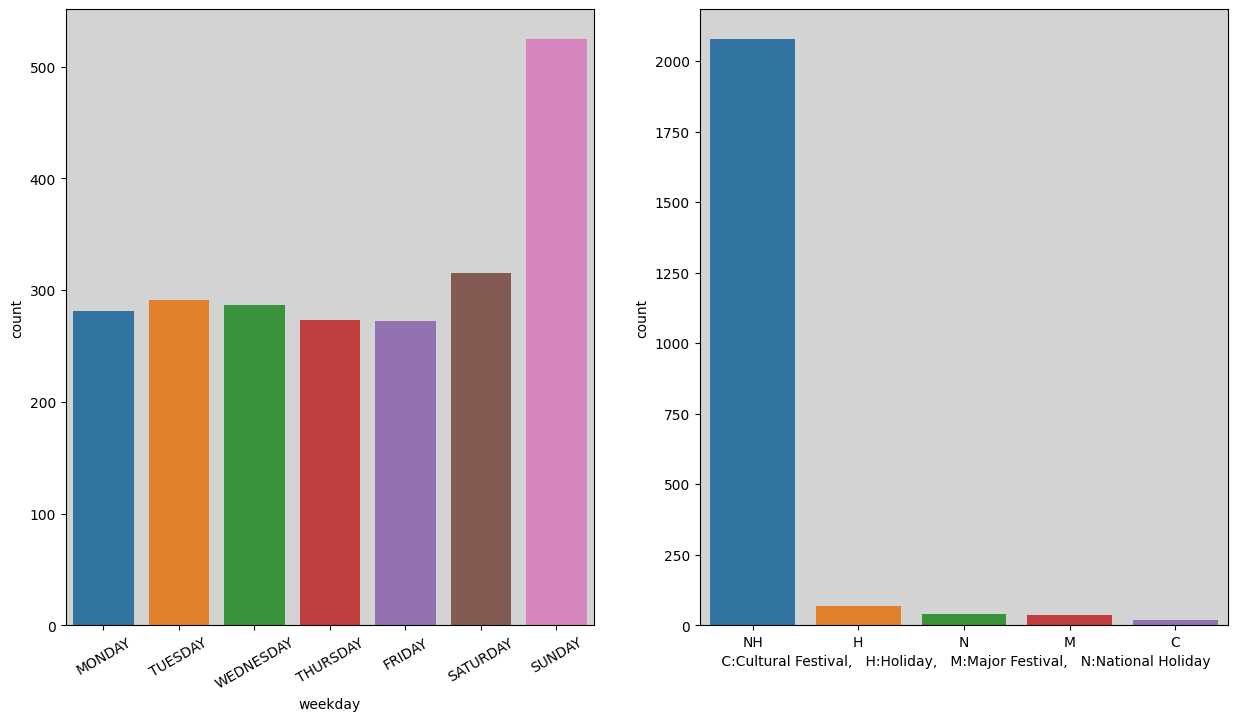

In [28]:
#plotting the countplots for "Weekday"
plt.figure(figsize=(15,8))

plt.rcParams["axes.facecolor"]="lightgrey"
plt.subplot(1,2,1)
sns.countplot(x=atm_df.weekday)
plt.xticks(rotation=30)

#plotting the countplots for "Festival Religion"
plt.subplot(1,2,2)
sns.countplot(x=atm_df.festival_religion)
plt.xlabel(" C:Cultural Festival,   H:Holiday,   M:Major Festival,   N:National Holiday")
plt.show()

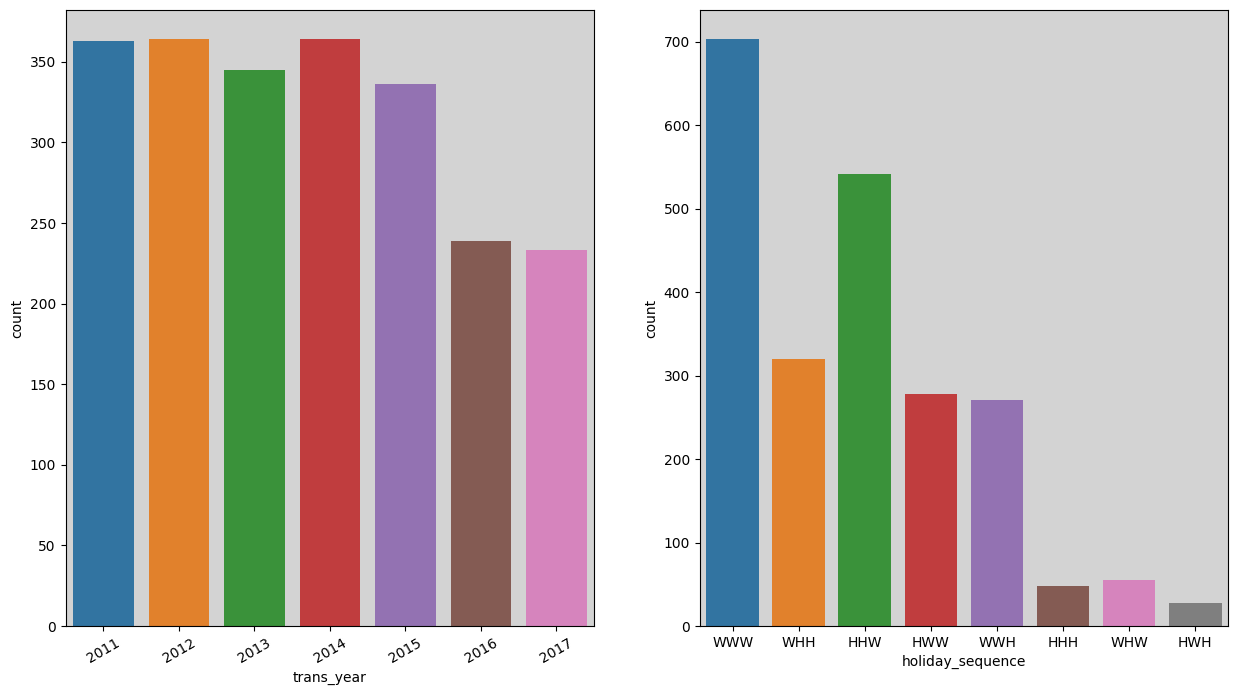

In [29]:
#plotting the countplot for "Transaction Years"
plt.figure(figsize=(15,8))
plt.rcParams["axes.facecolor"]="lightgrey"

plt.subplot(1,2,1)
sns.countplot(x=atm_df.trans_year)
plt.xticks(rotation=30)

#plotting the countplot for "Holiday Sequence"
plt.subplot(1,2,2)
sns.countplot(x=atm_df.holiday_sequence)
plt.show()

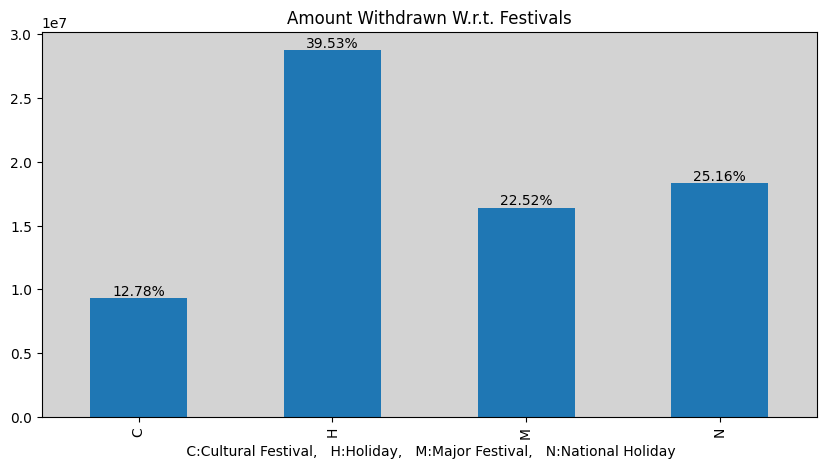

In [30]:
#Ploting "Total_Amount_Transaction" with respect to "Festival Religion"
revenue_holidays=atm_df.groupby("festival_religion")["total_amount_withdrawn"].sum()[0:-1]
plt.figure(figsize=(10,5))
plt.rcParams["axes.facecolor"]="lightgray"
revenue_holidays.plot(kind="bar")
plt.xlabel(" C:Cultural Festival,   H:Holiday,   M:Major Festival,   N:National Holiday")
plt.title("Amount Withdrawn W.r.t. Festivals")
total=revenue_holidays.sum()
for i, v in enumerate(revenue_holidays):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()

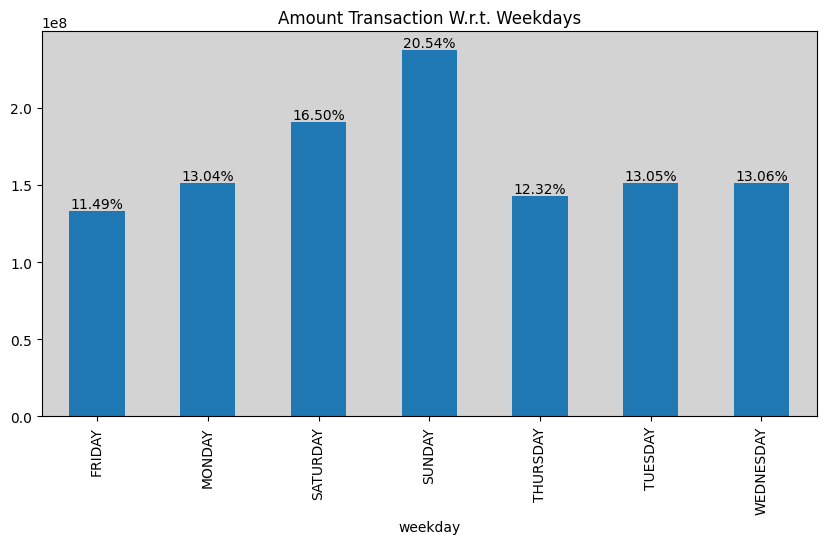

In [31]:
#Ploting "Total_Amount_Transaction" with respect to "Weekdays"
transaction_weekday=atm_df.groupby("weekday")["total_amount_withdrawn"].sum()
plt.figure(figsize=(10,5))
plt.rcParams["axes.facecolor"]="lightgray"
transaction_weekday.plot(kind="bar")

plt.title("Amount Transaction W.r.t. Weekdays")
total=transaction_weekday.sum()
for i, v in enumerate(transaction_weekday):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()

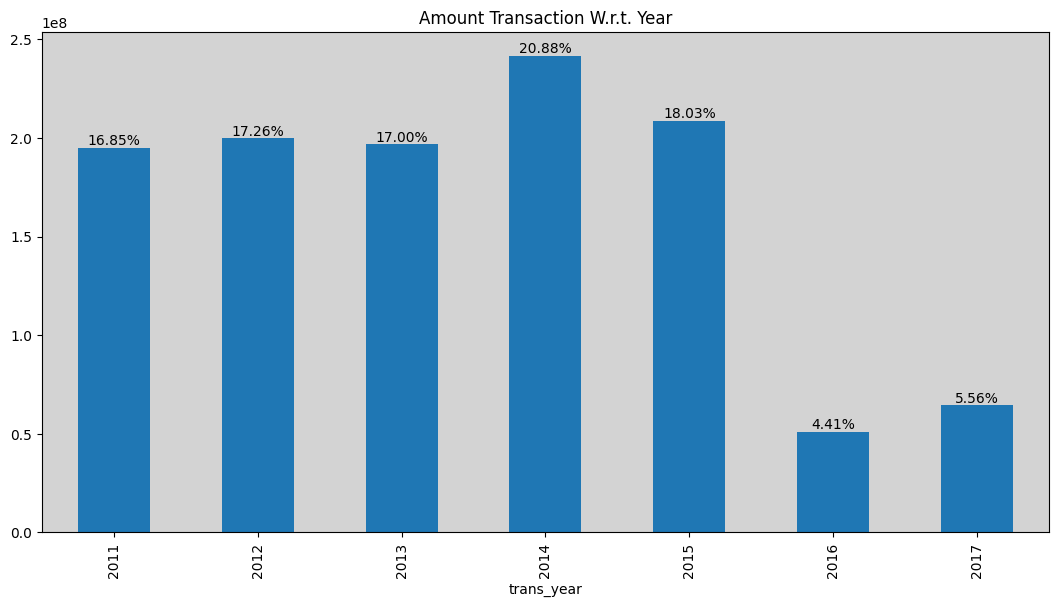

In [32]:
#Ploting "Total_Amount_Transaction" with respect to "Year"
transaction_year=atm_df.groupby("trans_year")["total_amount_withdrawn"].sum()

plt.figure(figsize=(13,6.5))
plt.rcParams["axes.facecolor"]="lightgray"
transaction_year.plot(kind="bar")

plt.title("Amount Transaction W.r.t. Year")
total=transaction_year.sum()
for i, v in enumerate(transaction_year):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()


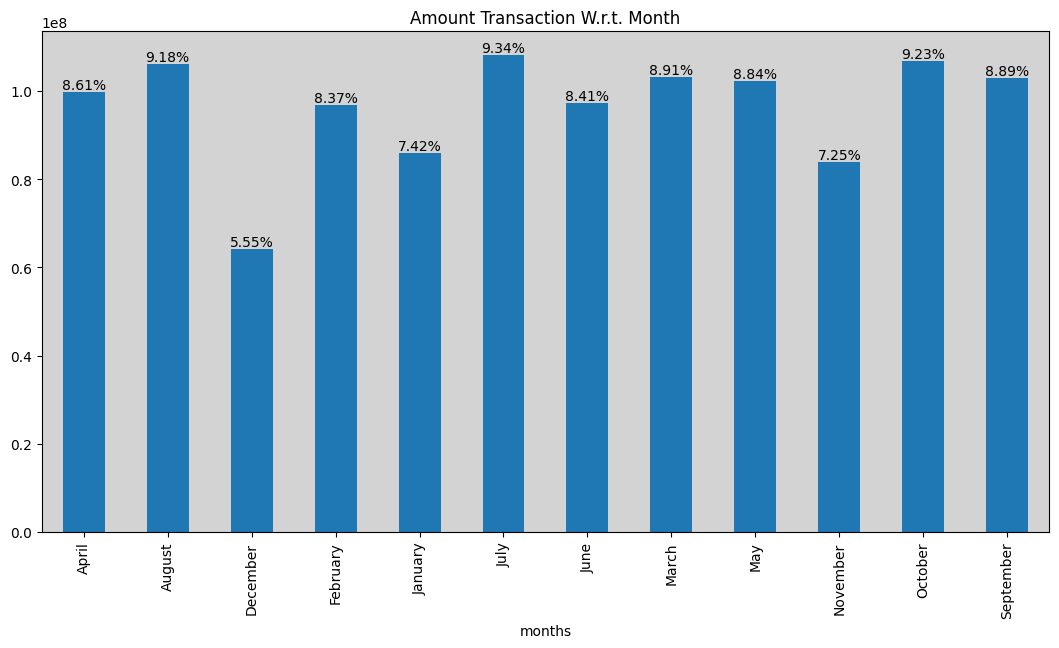

In [3]:
#Ploting "Total_Amount_Transaction" with respect to "Month"
month={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
atm_df["months"]=atm_df.trans_month.map(month)

transaction_month=atm_df.groupby("months")["total_amount_withdrawn"].sum()

plt.figure(figsize=(13,6.5))
plt.rcParams["axes.facecolor"]="lightgray"
transaction_month.plot(kind="bar")

plt.title("Amount Transaction W.r.t. Month")
total=transaction_month.sum()
for i, v in enumerate(transaction_month):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()

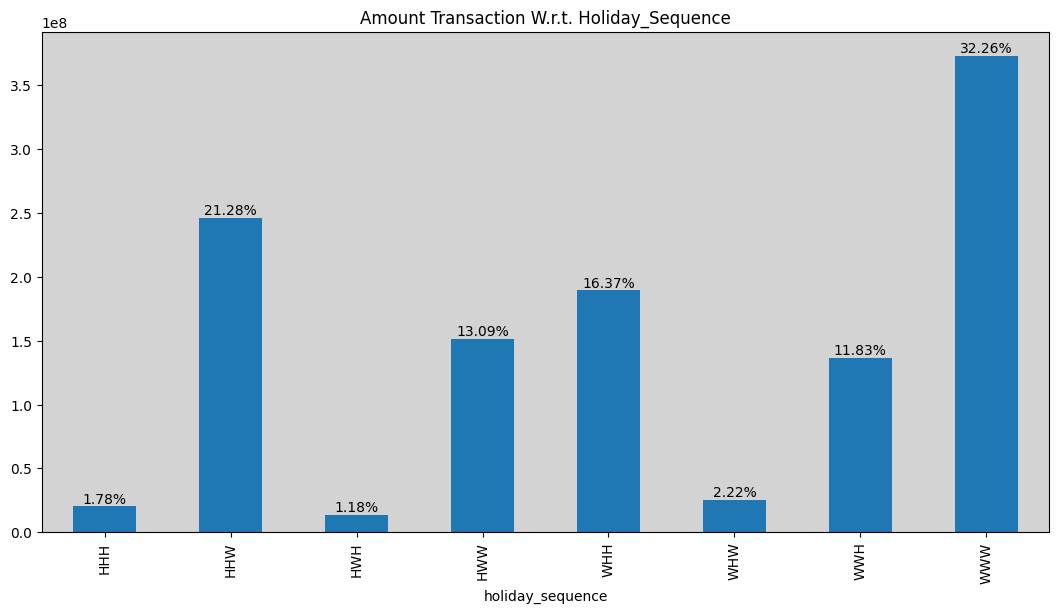

In [34]:
#Ploting "Total_Amount_Transaction" with respect to "Holiday_Sequence"
transaction_holiday_seq=atm_df.groupby("holiday_sequence")["total_amount_withdrawn"].sum()

plt.figure(figsize=(13,6.5))
plt.rcParams["axes.facecolor"]="lightgray"
transaction_holiday_seq.plot(kind="bar")

plt.title("Amount Transaction W.r.t. Holiday_Sequence")
total=transaction_holiday_seq.sum()
for i, v in enumerate(transaction_holiday_seq):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()

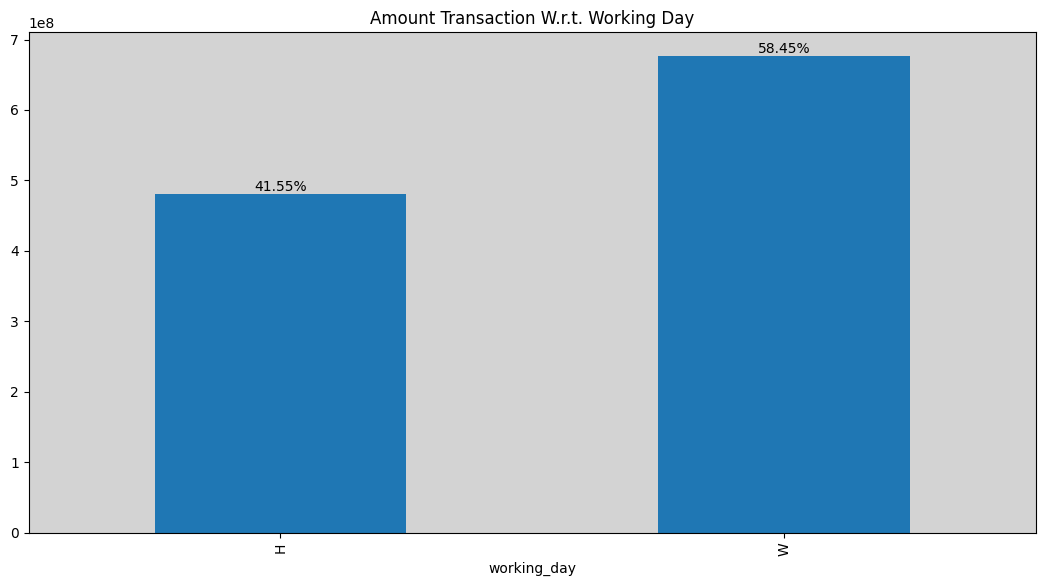

In [35]:
#Ploting "Total_Amount_Transaction" with respect to "Working_day"
transaction_working=atm_df.groupby("working_day")["total_amount_withdrawn"].sum()

plt.figure(figsize=(13,6.5))
plt.rcParams["axes.facecolor"]="lightgray"
transaction_working.plot(kind="bar")

plt.title("Amount Transaction W.r.t. Working Day")
total=transaction_working.sum()
for i, v in enumerate(transaction_working):
  per=(v/total)*100
  plt.text(i,v, f"{per:.2f}%", ha="center",va="bottom")
plt.show()

In [36]:
#Creating a Dummy Data frames from existing Data frames with Needed Columns
df=pd.get_dummies(atm_df,columns=['weekday', 'festival_religion', 'working_day','holiday_sequence'])

In [37]:
df.info() #checking the Information Of Dummy Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      2244 non-null   int64 
 1   atm_name                2244 non-null   object
 2   trans_date_set          2244 non-null   int64 
 3   trans_month             2244 non-null   int64 
 4   trans_year              2244 non-null   int64 
 5   prevweek_mean           2244 non-null   int64 
 6   total_amount_withdrawn  2244 non-null   int64 
 7   months                  2244 non-null   object
 8   weekday_FRIDAY          2244 non-null   uint8 
 9   weekday_MONDAY          2244 non-null   uint8 
 10  weekday_SATURDAY        2244 non-null   uint8 
 11  weekday_SUNDAY          2244 non-null   uint8 
 12  weekday_THURSDAY        2244 non-null   uint8 
 13  weekday_TUESDAY         2244 non-null   uint8 
 14  weekday_WEDNESDAY       2244 non-null   uint8 
 15  fest

In [38]:
#Dropping Unnecessary columns from Dummy Dataset
df=df.drop(["id","atm_name"],axis=1)
df.columns

Index(['trans_date_set', 'trans_month', 'trans_year', 'prevweek_mean',
       'total_amount_withdrawn', 'months', 'weekday_FRIDAY', 'weekday_MONDAY',
       'weekday_SATURDAY', 'weekday_SUNDAY', 'weekday_THURSDAY',
       'weekday_TUESDAY', 'weekday_WEDNESDAY', 'festival_religion_C',
       'festival_religion_H', 'festival_religion_M', 'festival_religion_N',
       'festival_religion_NH', 'working_day_H', 'working_day_W',
       'holiday_sequence_HHH', 'holiday_sequence_HHW', 'holiday_sequence_HWH',
       'holiday_sequence_HWW', 'holiday_sequence_WHH', 'holiday_sequence_WHW',
       'holiday_sequence_WWH', 'holiday_sequence_WWW'],
      dtype='object')

In [39]:
# Shape of the Dummy Data frame
df.shape

(2244, 28)

<Axes: >

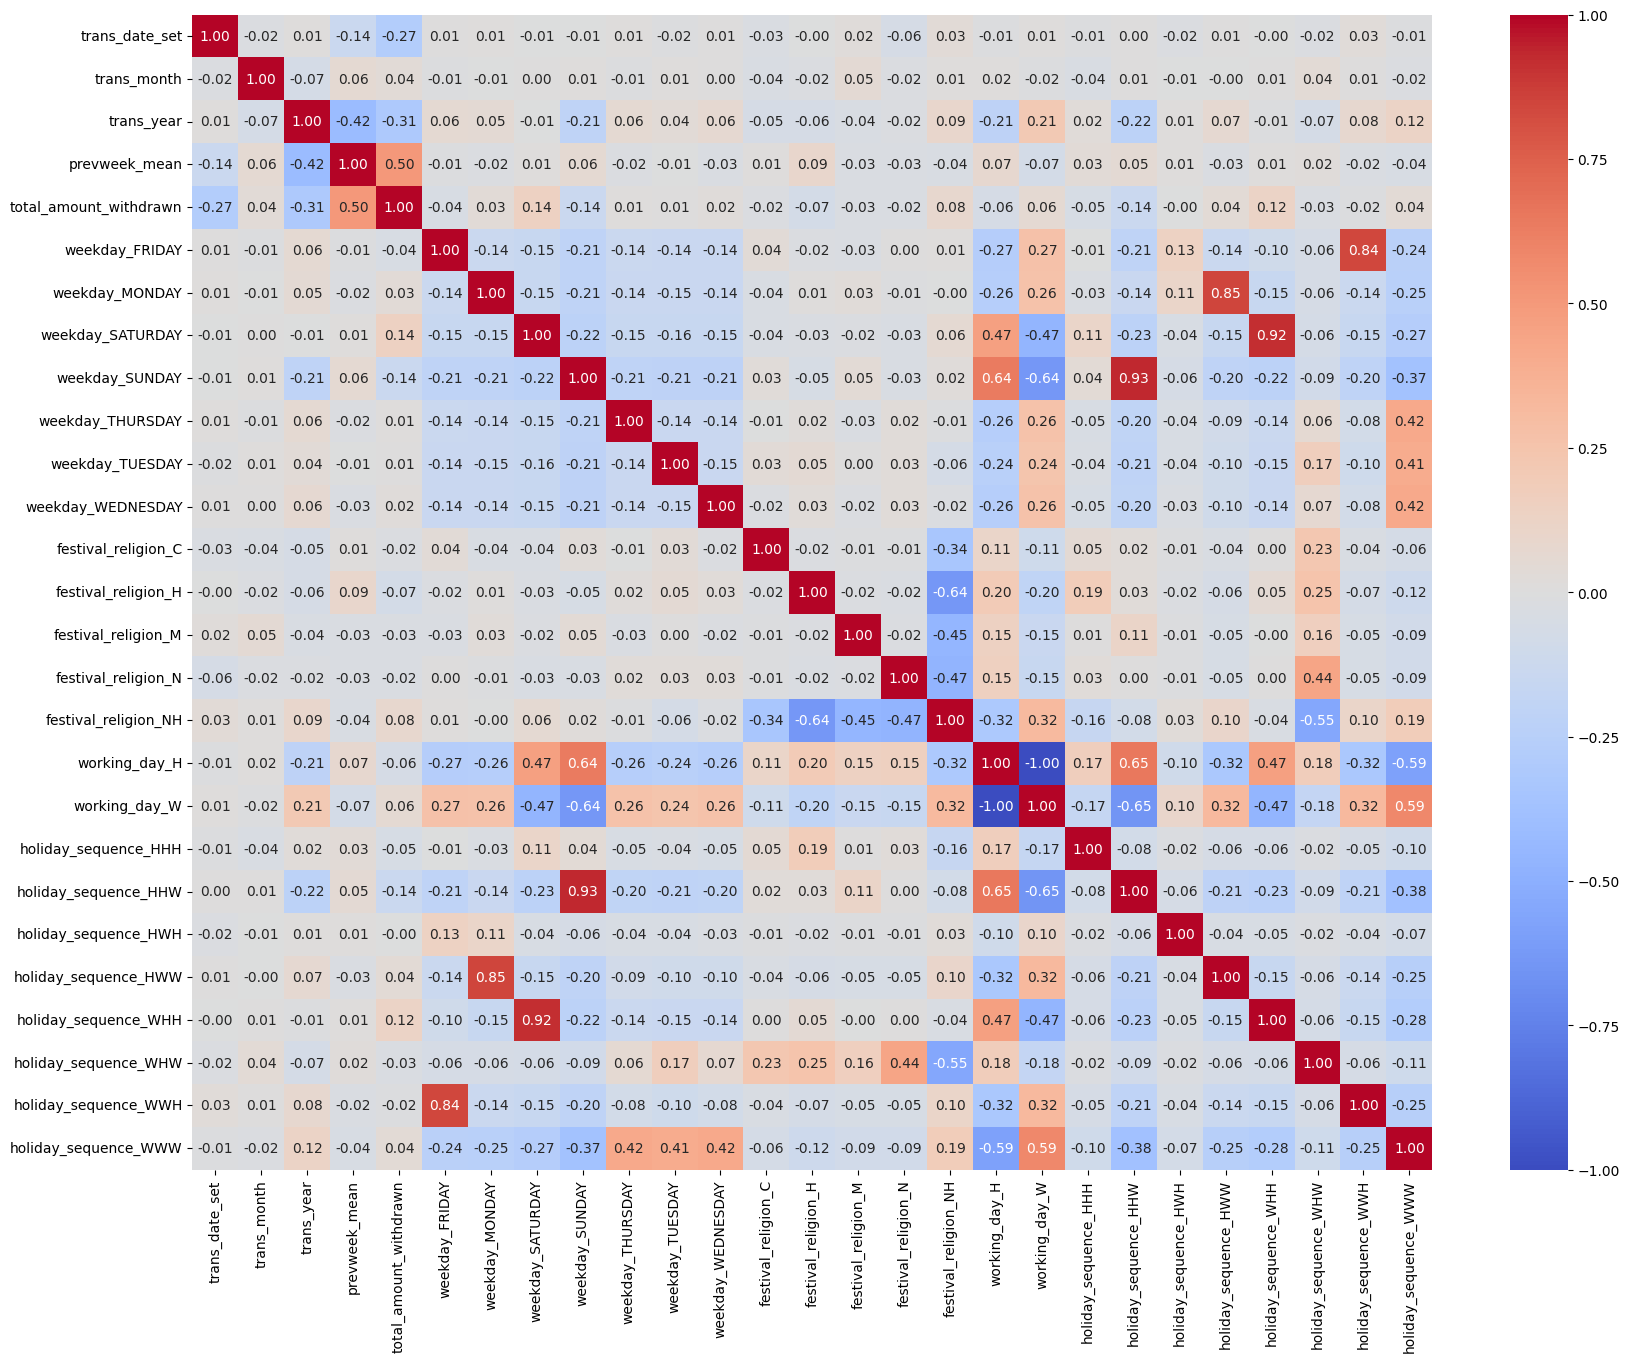

In [40]:
#Correlation of Dummy Data frame
corr=df.corr()
#Plotting the heatmap of the Dummy Data Frame
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")

# ANN Model Building

In [4]:
# Separating Input and Output Variables
x=atm_df.drop(["total_amount_withdrawn","atm_name","id","months"],axis=1)
y=atm_df["total_amount_withdrawn"]

#Splitting the Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=140,train_size=0.75)


print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1683, 8) (561, 8)
(1683,) (561,)


In [5]:
from sklearn import set_config
set_config(transform_output="pandas")

In [6]:
#standardization
num_columns=x_train[["prevweek_mean"]]

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
num_sc=sc.fit_transform(num_columns)

#converting categorical to numerical
cat_columns=x_train[['weekday', 'festival_religion', 'working_day','holiday_sequence','trans_date_set','trans_month','trans_year']]
from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder(sparse_output=False,drop="first")
cat_encode=encode.fit_transform(cat_columns)

#merging the preprocessed data
x_train_prepro=pd.merge(num_sc,cat_encode,right_index=True,left_index=True,how='inner')
x_train_prepro

,prevweek_mean,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,...,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_year_2012,trans_year_2013,trans_year_2014,trans_year_2015,trans_year_2016,trans_year_2017
297,1.020225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1443,1.058175,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
619,1.355866,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,0.724213,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,0.065619,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.667020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1616,0.054254,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,0.560523,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407,0.750927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#standardization
num_columns=x_test[["prevweek_mean"]]

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
num_sc=sc.fit_transform(num_columns)

#converting categorical to numerical
cat_columns=x_test[['weekday', 'festival_religion', 'working_day','holiday_sequence','trans_date_set','trans_month','trans_year']]
from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder(sparse_output=False,drop="first")
cat_encode=encode.fit_transform(cat_columns)

#merging the preprocessed data
x_test_prepro=pd.merge(num_sc,cat_encode,right_index=True,left_index=True,how='inner')
x_test_prepro

,prevweek_mean,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,...,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_year_2012,trans_year_2013,trans_year_2014,trans_year_2015,trans_year_2016,trans_year_2017
1013,0.804761,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,1.329418,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1369,0.216132,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1925,-0.664110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1267,1.592412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.541323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
372,0.943729,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1878,-2.485175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
461,-0.043238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from tensorflow.keras.initializers import he_normal

from tensorflow.keras.layers import Dense


2.13.0


In [20]:
#Creating the ANN model
model=Sequential()
#1st Hidden Layer
model.add(Dense(35,input_dim=42, activation="relu",kernel_initializer=he_normal()))
#2nd Hidden Layer
model.add(Dense(20,activation="relu",kernel_initializer=he_normal()))
#3rd Hidden Layer
model.add(Dense(15,activation="relu",kernel_initializer=he_normal()))
#4th Hidden Layer
model.add(Dense(10, activation="leaky_relu",kernel_initializer=he_normal()))
#5th Hidden Layer
model.add(Dense(1,activation="linear"))
#compiling the Model
model.compile(optimizer="adam",loss="mse",metrics=['mean_absolute_error'])

#Training the Model
history=model.fit(x_train_prepro,y_train,batch_size=32,epochs=200,verbose=1,shuffle=1)




Epoch 1/200
53/53 [==============================] - 1s 2ms/step - loss: 326207668224.0000 - mean_absolute_error: 512059.2812
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 326182338560.0000 - mean_absolute_error: 512035.2188
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 325904728064.0000 - mean_absolute_error: 511774.0000
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 324223270912.0000 - mean_absolute_error: 510186.2500
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 317658136576.0000 - mean_absolute_error: 504038.8125
Epoch 6/200
53/53 [==============================] - 0s 2ms/step - loss: 299311005696.0000 - mean_absolute_error: 486402.0625
Epoch 7/200
53/53 [==============================] - 0s 2ms/step - loss: 260243963904.0000 - mean_absolute_error: 447329.5938
Epoch 8/200
53/53 [==============================] - 0s 2ms/step - loss: 196286316544.0000 - mean_absolute_error: 3777

In [10]:
model.summary()
from tensorflow.keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                1505      
                                                                 
 dense_1 (Dense)             (None, 20)                720       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2711 (10.59 KB)
Trainable params: 2711 (10.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


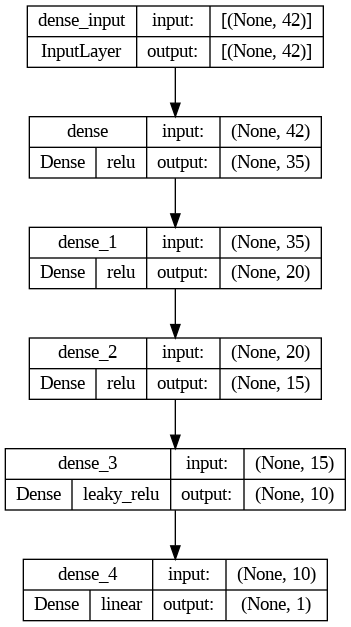

In [11]:
plot_model(model,show_shapes=True,show_layer_activations=True)

In [21]:
#Evaluating the Model
model.evaluate(x_test_prepro,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 32973049856.0000 - mean_absolute_error: 134849.6250


[32973049856.0, 134849.625]

In [22]:
#Predicting the Model
y_pred=model.predict(x_test_prepro)

18/18 [==============================] - 0s 1ms/step


In [31]:
#Evaluating the Metrics
from sklearn import metrics
r_sq=metrics.r2_score(y_test,y_pred)
print("R-Square:",r_sq)

n=y_test.shape[0]
p=y_pred.shape[1]
adj_r2=1-((1-r_sq)*(n-1)/(n-p-1))
print("Adjusted_R2:",adj_r2)

R-Square: 0.5163817969797755
Adjusted_R2: 0.5155166481371634


In [24]:
#Saving the Model
import pickle
pickle.dump(model,open(r"/content/drive/MyDrive/ATM ANN/model.pkl","wb"))

# Conclusion:
From the results of **Adjusted R-Square** Metric the **$Model$** performing at **Moderate** Level